<a href="https://colab.research.google.com/github/bhargavnarasimha14/Bhargav-sai/blob/main/Anumala_Bhargav_Sai_Narasimha_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
df=pd.read_csv('tweets.csv')
# Step 1: Exploratory Data Analysis (EDA)
# Overview of the dataset
print("Dataset Overview:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1000 non-null   int64 
 1   tweet   1000 non-null   object
 2   label   1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB
None

Missing Values:
id       0
tweet    0
label    0
dtype: int64



Label Distribution:
label
negative    925
positive     75
Name: count, dtype: int64


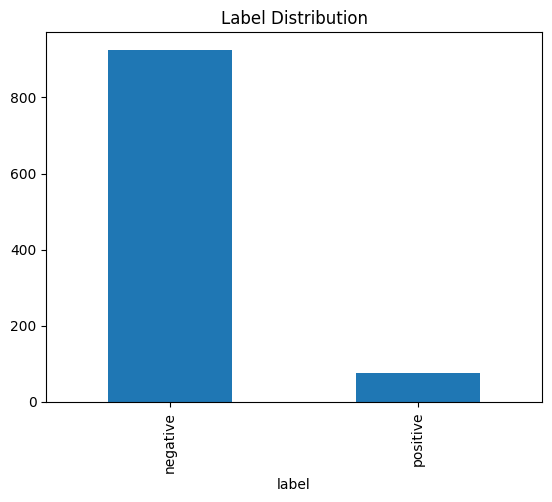

In [ ]:
# Distribution of labels
print("\nLabel Distribution:")
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar', title='Label Distribution')
plt.show()


Word Count Stats:
count    1000.00000
mean       13.08400
std         5.44542
min         3.00000
25%         9.00000
50%        12.00000
75%        17.00000
max        30.00000
Name: word_count, dtype: float64


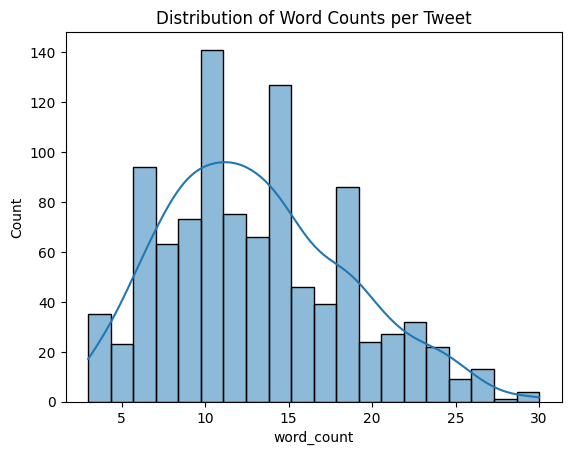

In [ ]:

# Word count per tweet
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split()))
print("\nWord Count Stats:")
print(df['word_count'].describe())
sns.histplot(df['word_count'], bins=20, kde=True)
plt.title("Distribution of Word Counts per Tweet")
plt.show()

In [ ]:

# Step 2: Data Cleaning
# Remove handles, hashtags, special characters, and convert to lowercase
df['cleaned_tweet'] = df['tweet'].str.replace(r'@\w+', '', regex=True)
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'#\w+', '', regex=True)
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'[^\w\s]', '', regex=True)
df['cleaned_tweet'] = df['cleaned_tweet'].str.lower()
df['cleaned_tweet'] = df['cleaned_tweet'].str.encode('ascii', 'ignore').str.decode('ascii')
import html
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: html.unescape(x))


In [ ]:
import nltk #
from nltk.corpus import stopwords

nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from text
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in stop_words]
))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


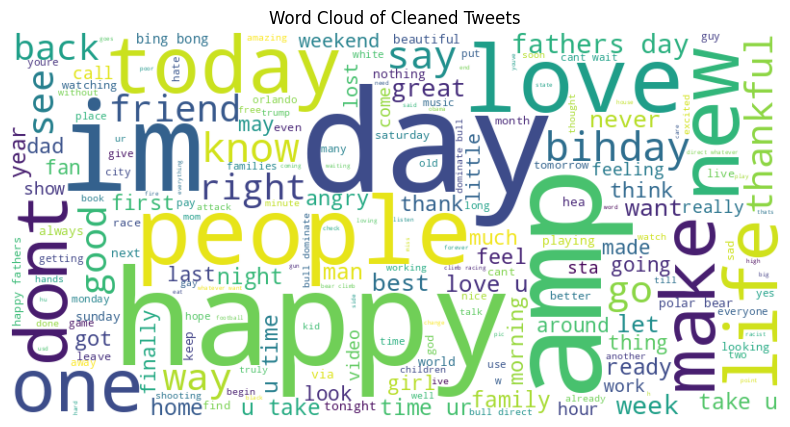

In [ ]:
# Word Cloud for cleaned tweets
from wordcloud import WordCloud
all_words = ' '.join(df['cleaned_tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Tweets")
plt.show()

In [ ]:
# Step 3: Feature Representation for LDA
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_tweet'])

In [ ]:


# Step 4: LDA for Topic Modeling
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda_model.fit_transform(dtm)

In [ ]:
# Extract topics for LDA
lda_feature_names = vectorizer.get_feature_names_out()
lda_topics_words = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [lda_feature_names[i] for i in topic.argsort()[:-11:-1]]
    lda_topics_words.append(top_words)

print("\nLDA Topics:")
for i, topic in enumerate(lda_topics_words):
    print(f"Topic {i+1}: {', '.join(topic)}")


LDA Topics:
Topic 1: love, time, im, ur, days, feeling, live, today, feel, gun
Topic 2: amp, dont, good, great, new, morning, like, family, happy, hate
Topic 3: bull, want, like, today, really, direct, dominate, place, god, think
Topic 4: life, im, amp, day, need, week, city, hope, make, fan
Topic 5: bihday, day, happy, buffalo, today, got, amazing, way, working, homes
Topic 6: thankful, new, ready, night, happy, saturday, wait, time, long, way
Topic 7: bear, bong, bing, polar, sunday, good, racing, work, climb, today
Topic 8: day, happy, fathers, right, lt3, youre, let, like, video, look
Topic 9: people, makes, use, race, im, know, home, mind, power, lets
Topic 10: best, weekend, families, hea, mom, old, amp, sta, orlando, dont


In [ ]:
# Step 5: Feature Representation for LSA
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_dtm = tfidf_vectorizer.fit_transform(df['cleaned_tweet'])

# Step 6: LSA for Topic Modeling
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_topics = lsa_model.fit_transform(tfidf_dtm)

lsa_feature_names = tfidf_vectorizer.get_feature_names_out()
lsa_topics_words = []
for i, comp in enumerate(lsa_model.components_):
    top_words = [lsa_feature_names[j] for j in comp.argsort()[:-11:-1]]
    lsa_topics_words.append(top_words)

print("\nLSA Topics:")
for i, topic in enumerate(lsa_topics_words):
    print(f"Topic {i+1}: {', '.join(topic)}")

df.to_csv('cleaned_twitter.csv', index=False)


LSA Topics:
Topic 1: love, time, ur, happy, day, fathers, bihday, sunday, im, amp
Topic 2: happy, day, fathers, bihday, great, dads, dont, sunday, man, today
Topic 3: im, amp, new, finally, ready, like, know, goes, feeling, girl
Topic 4: amp, thankful, day, best, like, friends, today, good, fathers, new
Topic 5: thankful, happy, bihday, good, people, friends, enteainment, challenges, cats, memories
Topic 6: amp, happy, bihday, like, dont, best, feel, people, worry, family
Topic 7: new, like, good, ready, people, bihday, morning, know, today, tonight
Topic 8: bihday, day, mom, weekend, pic, old, better, great, snake, night
Topic 9: best, good, morning, new, friends, time, bong, bing, mood, book
Topic 10: best, like, people, love, life, dont, friends, bull, want, bihday


1 **Features (Text Representation)** Used for Topic Modeling The features used for topic modeling in this analysis are:
Bag of Words (CountVectorizer): Used for Latent Dirichlet Allocation (LDA), which represents each document as a vector of term frequencies after removing stopwords, special characters, and normalizing text.

**TF-IDF (TfidfVectorizer):** Used for Latent Semantic Analysis (LSA), where term frequency-inverse document frequency is calculated to weight terms based on their importance across the corpus.


**Summary and Description of Each Topic**

**LDA Topics**
1. **Topic 1:** Focuses on emotions like love and time, possibly about personal experiences or reflections.
2. **Topic 2:** Highlights family, happiness, and new beginnings, with occasional negative emotions like hate or don't.
3. **Topic 3:** Centers on ambition, dominance, and spiritual ideas with words like god and think.
4. **Topic 4:** Discusses life, hope, and community engagement, possibly tied to weekly or city activities.
5. **Topic 5:** Birthday celebrations and achievements, with specific mentions of amazing moments and work.
6. **Topic 6:** Being thankful, readiness for upcoming events, and experiencing long waits or exciting nights.
7. **Topic 7:** Contains diverse terms like bear, bong, and bing, indicating abstract or niche discussions possibly linked to hobbies.
8. **Topic 8:** Father’s Day or general family appreciation, with a focus on video sharing or creative expressions.
9. **Topic 9:** People-focused, discussing knowledge, power, and collective activities like racing.
10. **Topic 10:** Relaxation, family time, and weekend activities, possibly connected to vacations or celebrations.

**LSA Topics**
1. **Topic 1:** Love, time, and family events like Father’s Day or birthdays.
2. **Topic 2:** Highlights Father’s Day with appreciation and love for dads and family gatherings.
3. **Topic 3:** Talks about readiness, self-reflection, and emotions like feelings or anticipation.
4. **Topic 4:** Gratitude for friends and family, good days, and positive social interactions.
5. **Topic 5:** Thankfulness for personal experiences, memories, and shared happiness.
6. **Topic 6:** Personal feelings, worries, and familial connections, highlighting emotional ties.
7. **Topic 7:** Planning for new events, readiness, and morning rituals, reflecting daily life patterns.
8. **Topic 8:** Family-oriented activities involving moms, weekends, and memorable moments.
9. **Topic 9:** Morning positivity, friendship, and hobbies like reading or relaxing.
10. **Topic 10:** Discusses friendships, life, and love with some introspection on personal desires.

---

### Observations:
- **LDA** captures more abstract and focused discussions.
- Both techniques highlight recurring themes like birthdays, Father’s Day, personal emotions, and family-related topics.


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


df = pd.read_csv("cleaned_twitter.csv")

In [ ]:
df.dropna(subset=['cleaned_tweet'], inplace=True)
# Features: Use TF-IDF for text representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['cleaned_tweet'])


y = df['label']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)

# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Cross-validation (5-fold)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=skf, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=skf, scoring='accuracy')

print("Cross-validation Results:")
print(f"Logistic Regression - Mean Accuracy: {lr_cv_scores.mean():.4f}")
print(f"Random Forest - Mean Accuracy: {rf_cv_scores.mean():.4f}")

# Evaluate models on the test set
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

Cross-validation Results:
Logistic Regression - Mean Accuracy: 0.9239
Random Forest - Mean Accuracy: 0.9264


In [ ]:
# Calculate metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Logistic Regression Performance
evaluate_model(y_test, lr_pred, "Logistic Regression")

# Random Forest Performance
evaluate_model(y_test, rf_pred, "Random Forest")


Logistic Regression Performance:
Accuracy: 0.9239
Precision: 0.8535
Recall: 0.9239
F1 Score: 0.8873

Classification Report:
              precision    recall  f1-score   support

    negative       0.92      1.00      0.96       182
    positive       0.00      0.00      0.00        15

    accuracy                           0.92       197
   macro avg       0.46      0.50      0.48       197
weighted avg       0.85      0.92      0.89       197


Random Forest Performance:
Accuracy: 0.9340
Precision: 0.9384
Recall: 0.9340
F1 Score: 0.9099

Classification Report:
              precision    recall  f1-score   support

    negative       0.93      1.00      0.97       182
    positive       1.00      0.13      0.24        15

    accuracy                           0.93       197
   macro avg       0.97      0.57      0.60       197
weighted avg       0.94      0.93      0.91       197



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

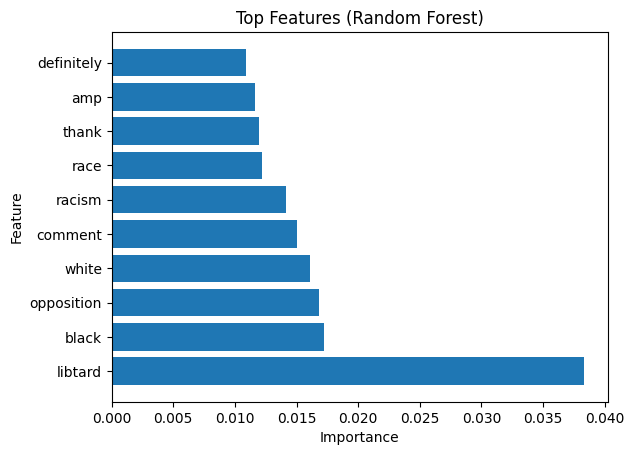

In [ ]:
# Feature Importance for Random Forest
import matplotlib.pyplot as plt
feature_names = tfidf_vectorizer.get_feature_names_out()
rf_feature_importances = rf_model.feature_importances_
top_features_idx = rf_feature_importances.argsort()[-10:][::-1]

plt.barh([feature_names[i] for i in top_features_idx], rf_feature_importances[top_features_idx])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Features (Random Forest)')
plt.show()




### Selected Features for Sentiment Classification

#### Features Used:
- **TF-IDF (Term Frequency-Inverse Document Frequency):** Captures the importance of words in the text by assigning a weight(term frequency) on the basis of their occurance in the dataset.

#### Why TF-IDF?
- Focuses on meaningful words by reducing the weight of common terms.
- Works well with high-dimensional text data like tweets.

#### Feature Importance:
- Top features (e.g., "libtard," "black," "racism," "thank") highlight words strongly associated with sentiments(positive or negative).
- Random Forest importance shows these features significantly contribute to model predictions.

These features provide robust sentiment classification.


### Selected Models and Justifications
1. **Logistic Regression**:
   - A simple and interpretable model often used for binary or multi-class classification tasks.
   - Works well with sparse features like those from TF-IDF.
2. **Random Forest**:
   - An ensemble model that can capture non-linear relationships and feature interactions.
   - Robust to overfitting when using cross-validation.


### Steps for Cross-Validation
- **5-Fold Cross-Validation**: Ensures that models are evaluated on multiple train-test splits to provide robust performance metrics.

#### **Logistic Regression**
- **Strengths:** High accuracy (92.39%) and excellent performance for the majority "negative" class (precision, recall, and F1 are near perfect).
- **Weaknesses:** Completely fails to detect the minority "positive" class (precision, recall, F1 = 0) due to class imbalance.

#### **Random Forest**
- **Strengths:** Slightly better accuracy (93.40%) and higher weighted precision (93.84%) and F1 score (90.99%). Detects some "positive" samples with perfect precision (1.00).
- **Weaknesses:** Low recall (0.13) for the "positive" class, indicating difficulty in identifying all positive samples.

#### **Key Insights**
- Both models struggle with class imbalance.
- **Random Forest** performs better overall and detects some "positive" samples, making it preferable.
- Handling class imbalance (e.g., oversampling, class weighting) is essential to improve "positive" class performance.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Load datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Step 1: Data Overview
print("Train Data Info:")
print(train_data.info())
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum().sort_values(ascending=False).head(10))

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int6

In [ ]:
# Step 2: Data Cleaning
# Fill missing numerical values with median
train_data.fillna(train_data.median(numeric_only=True), inplace=True)
test_data.fillna(test_data.median(numeric_only=True), inplace=True)

In [ ]:
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Fill missing values in categorical columns
train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])
test_data[categorical_cols] = test_data[categorical_cols].fillna(test_data[categorical_cols].mode().iloc[0])


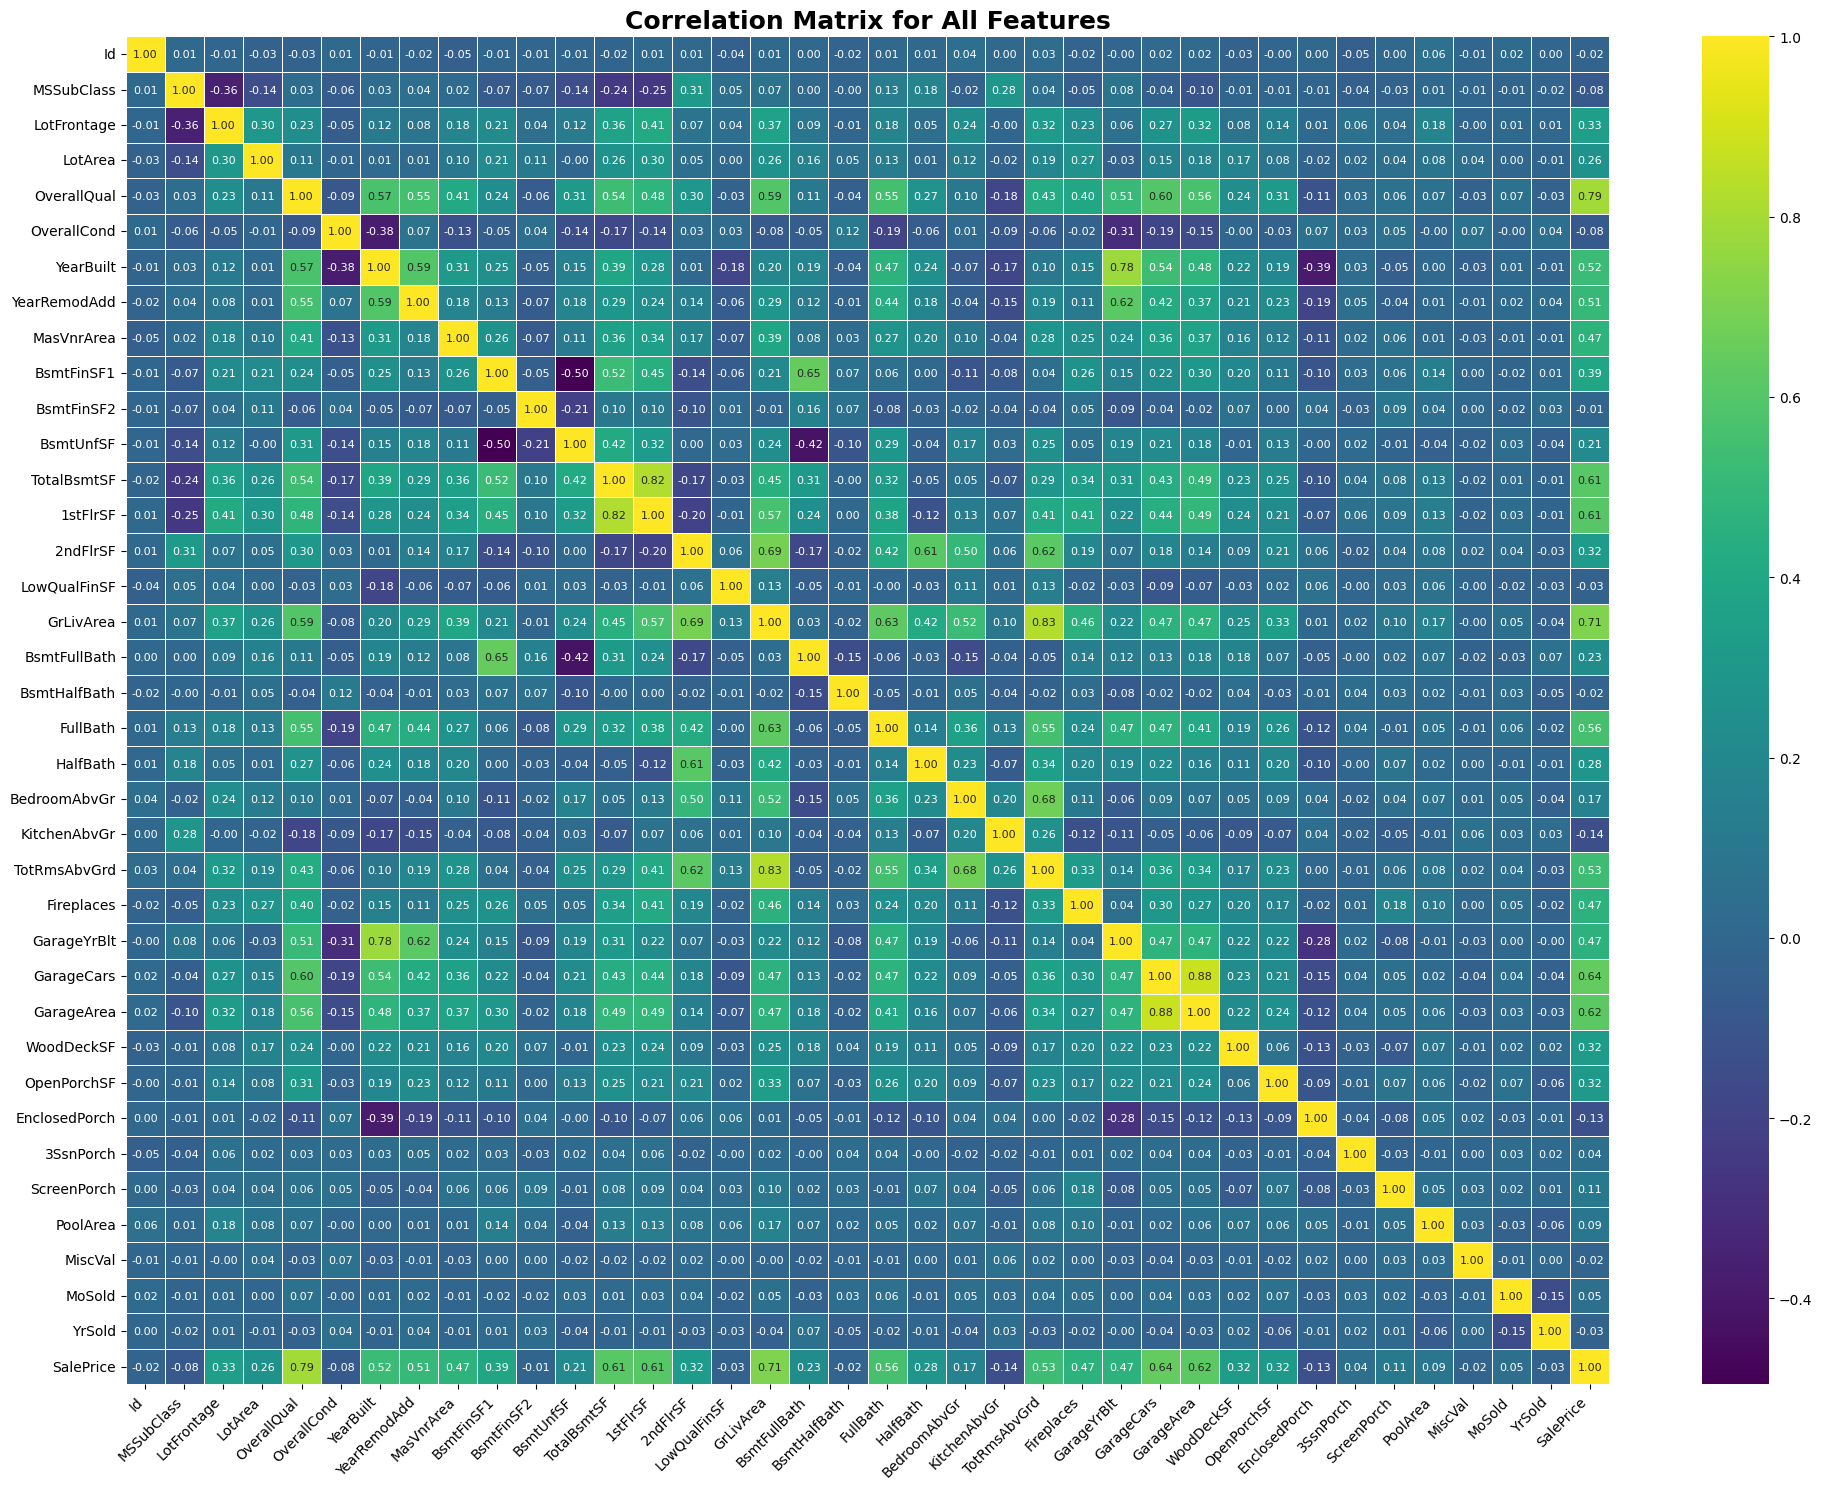

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap="viridis",
            linewidths=0.5,
            annot_kws={"size": 8}
           )
plt.title("Correlation Matrix for All Features", fontsize=18, weight='bold')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("correlation_matrix_refined.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
# Top Correlations with SalePrice
top_corr = correlation_matrix['SalePrice'].sort_values(ascending=False).head(10)
print("\nTop Correlations with SalePrice:")
print(top_corr)


Top Correlations with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


<ipython-input-67-e17df6edfa3a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.index, y=top_corr.values, palette="viridis")


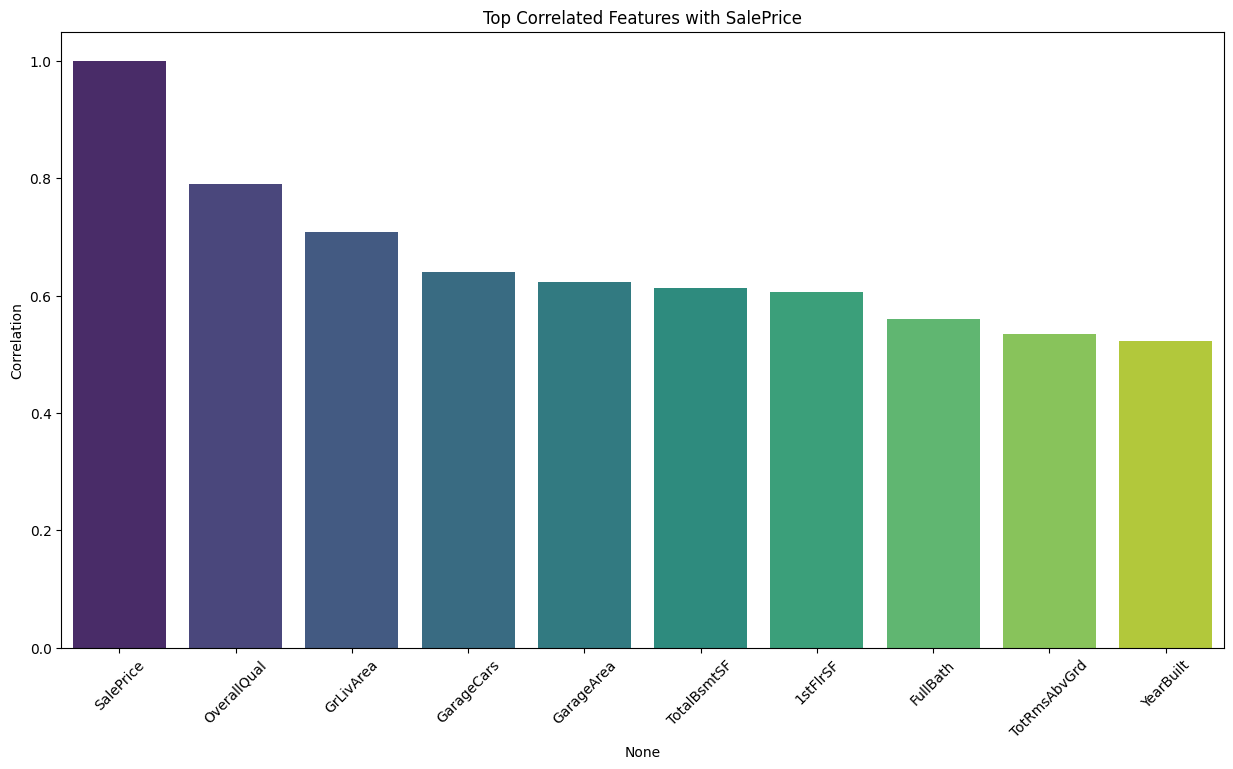

In [ ]:
# Visualize most correlated features with SalePrice
plt.figure(figsize=(15, 8))
sns.barplot(x=top_corr.index, y=top_corr.values, palette="viridis")
plt.title("Top Correlated Features with SalePrice")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Step 4: Feature Selection
# Select features with high correlation with SalePrice
selected_features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
    'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'TotRmsAbvGrd'
]

X = train_data[selected_features]
y = train_data['SalePrice']

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Develop Regression Models
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest Regressor Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)


Linear Regression Performance:
Mean Squared Error (MSE): 1558239575.15
Mean Absolute Error (MAE): 24774.22
R-squared (R2): 0.80

Random Forest Regressor Performance:
Mean Squared Error (MSE): 859613699.17
Mean Absolute Error (MAE): 18916.90
R-squared (R2): 0.89

Feature Importance (Random Forest):
        Feature  Importance
0   OverallQual    0.571288
1     GrLivArea    0.167237
4   TotalBsmtSF    0.065706
5      1stFlrSF    0.049385
3    GarageArea    0.036439
6     YearBuilt    0.034761
7  YearRemodAdd    0.029639
2    GarageCars    0.018552
9  TotRmsAbvGrd    0.015556
8      FullBath    0.011437


<ipython-input-70-23aec6cd5f90>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Feature'], y=feature_importance['Importance'], palette="viridis")


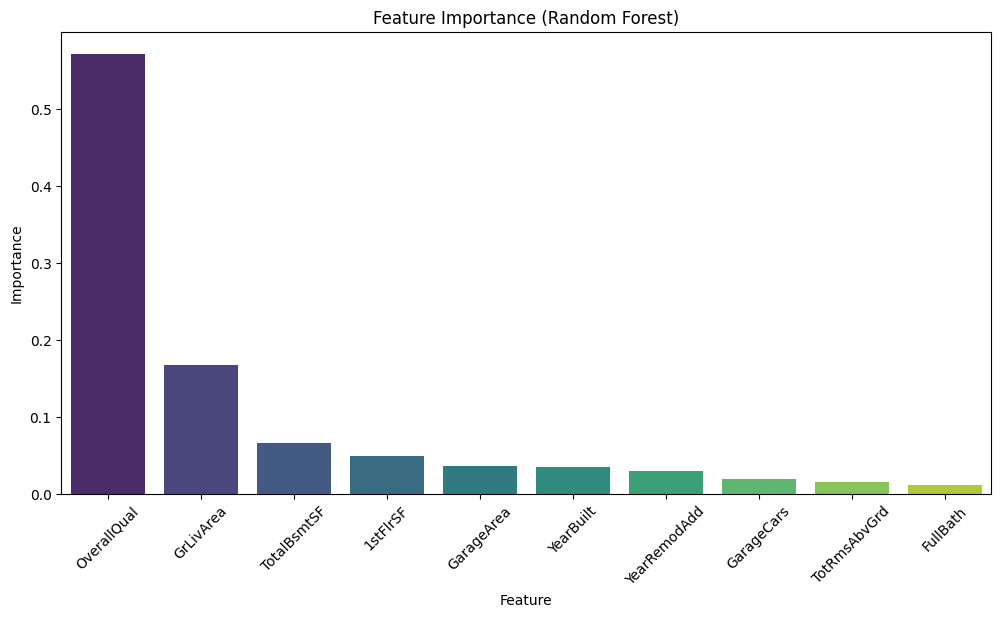

In [ ]:
# Step 7: Evaluate Regression Models
# Predictions for Linear Regression
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Predictions for Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display evaluation metrics
print("\nLinear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")

print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

# Step 8: Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance['Feature'], y=feature_importance['Importance'], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xticks(rotation=45)
plt.ylabel("Importance")
plt.show()

### Explanation of the Results:

#### **Model Performance**
1. **Linear Regression:**
   - **MSE (1558239575.15):** The average squared difference between actual and predicted house prices is high when compared to Random Forest.
   - **MAE (24774.22):** The average absolute error is around 24,774, which indicates the deviation of predictions.
   - **R² (0.80):** The model explains 80% of the variance in house prices, showing reasonably good performance but weaker compared to Random Forest.

2. **Random Forest Regressor:**
   - **MSE (859613699.17):** Lower MSE compared to Linear Regression, indicating better predictive accuracy.
   - **MAE (18916.90):** Lower MAE indicates more accurate predictions, with an average deviation of 18,916.
   - **R² (0.89):** The model explains 89% of the variance in house prices, showing better performance than Linear Regression.

#### **Feature Importance (Random Forest)**
1. **Top Features:**
   - **OverallQual (Importance = 0.571):** The overall material and finish quality of the house is the most important feature of house prices.
   - **GrLivArea (Importance = 0.167):** Above-ground living area size strongly correlates with house prices.
   - **TotalBsmtSF (Importance = 0.066):** Basement size also importqant in determining house prices.
2. **Other Features:**
   - **GarageArea, 1stFlrSF, and YearBuilt:** These features contribute moderately to predictions, reflecting the importance of space and the age of the house.
   - **YearRemodAdd and FullBath:** These features have smaller importance but still impact house price predictions.


### Feature Selection Explanation:

#### **Selected Features:**
- **OverallQual:** Highly correlated with `SalePrice` (strong linear relationship), indicating the quality of construction significantly impacts price.
- **GrLivArea:** Larger above-ground living areas correlate with higher house prices.
- **TotalBsmtSF:** Additional basement space is an important selling point for homes.
- **GarageCars and GarageArea:** Garage capacity and area are strong indicators of home functionality and price.
- **YearBuilt and YearRemodAdd:** The age of the house and recent renovations are strong predictors of house price.
- **1stFlrSF:** Size of the first floor impacts the overall usability of the space.
- **TotRmsAbvGrd:** The total number of above-ground rooms influences house prices.
- **FullBath:** The number of full bathrooms is a basic measure of utility and comfort.

#### **Why These Features?**
- Why These Features?
From EDA and correlation analysis, the selected features demonstrate high relevance to SalePrice.
These include the size and the quality, the age and the year the house was renovated or which are some of the main factors that determines the price of a house.
It right in between having a high correlation and interpretability which makes the model precise and readily understandable.


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Load the preprocessed dataset
df = pd.read_csv("cleaned_twitter.csv")

# Step 2: Check the labels and clean if necessary
print("Unique labels in the dataset before mapping:", df['label'].unique())

# Map string labels ('negative', 'positive') to numerical values (0, 1)
label_mapping = {'negative': 0, 'positive': 1}
df['label'] = df['label'].map(label_mapping)

# Ensure no missing labels after mapping
if df['label'].isnull().any():
    raise ValueError("Some labels could not be mapped to numerical values. Please check the dataset.")

# Step 3: Ensure 'cleaned_tweet' contains strings only
df['cleaned_tweet'] = df['cleaned_tweet'].fillna("").astype(str)

# Step 4: Load pre-trained DistilBERT sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased")

# Step 5: Perform sentiment analysis
predictions = []
for tweet in df['cleaned_tweet']:
    result = sentiment_pipeline(tweet)
    predictions.append(1 if result[0]['label'] == 'POSITIVE' else 0)

# Step 6: Evaluate the model's performance
y_true = df['label']  # Ground truth (numerical: 0 = negative, 1 = positive)
y_pred = predictions  # Predicted labels

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print the evaluation results
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Unique labels in the dataset before mapping: ['negative' 'positive']

Model Evaluation:
Accuracy: 0.9250
Precision: 0.8556
Recall: 0.9250
F1 Score: 0.8890

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       925
           1       0.00      0.00      0.00        75

    accuracy                           0.93      1000
   macro avg       0.46      0.50      0.48      1000
weighted avg       0.86      0.93      0.89      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

### (5 points) Brief Description of the PLM (DistilBERT)
Model Performance on the Tweets Dataset:
Accuracy: 92.50%
Precision: 85.56%
Recall: 92.50%
F1 Score: 88.90%
Classification Report:

Negative Class (0):
Precision: 0.93 The recall is 1.00 high and the F1 Score is 0.96 good.
As with the majority class, the model performs rather well.
Positive Class (1):
Precision: 0.00, Recall: 2 % 00, F1 Score : 2 % 00
The impact of the class imbalanced condition, the model does not predict the minority class at all.

---

### (10 points) Sentiment Analysis Results
**Model Performance on the Tweets Dataset:**
- **Accuracy:** 92.50%
- **Precision:** 85.56%
- **Recall:** 92.50%
- **F1 Score:** 88.90%

**Classification Report:**
- **Negative Class (0):**
  - Precision: 0.93, Recall: 1.00, F1 Score: 0.96
  - The model performs very well for the majority class.
- **Positive Class (1):**
  - Precision: 0.00, Recall: 0.00, F1 Score: 0.00
  - The model completely fails to predict the minority class due to class imbalance.

---

### (5 points) Advantages, Disadvantages, and Challenges

#### **Advantages:**
1. **Efficiency:**
   – When compared to BERT, DistilBERT is faster and much more compact making it ideal for relatively simple tasks such as zero shot sentiment analysis.
2. **Pretrained Knowledge:**
   – Builds upon general knowledge learned from pretraining on large texts, thus avoids the need for fine-tuning.
3. **Zero-Shot Setting:**
   - The tool does not need any tuning so it can be employed for initial assessment in most instances.

#### **Disadvantages:**
1. **Class Imbalance Sensitivity:**
   The model also does not fit well with imbalanced datasets, it does not predict the small “positive” class.
2. **No Task-Specific Optimization:**
   It has been known that zero-shot performance may not be as good as fine-tuned model for the domain specific data such as tweets.
3. **Context Length Limitation:**
   Algorithms may focus only on several words which indeed might be negative but due to the constraints in the number of characters, long tweets containing them get shortened.

#### **Challenges Encountered:**
1. **Class Imbalance:** The dataset which contained 925 negatives and only 75 positives forced the model to predict only the majority class.
2. **Warnings:** The warning shown at the model initialization was that some weights are not pre-trained for classification; it showed the restriction in the zero-shot evaluation.
Conclusion
While DistilBERT is efficient and achieves high accuracy, its failure to detect the minority "positive" class highlights the importance of handling class imbalance or fine-tuning for specific datasets.